In [25]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
import hvplot.pandas
import datetime as dt
import numpy as np
%matplotlib inline

In [13]:
# Read the data from the tsla_historical.csv file into a Pandas DataFrame
# df_home_sales = pd.read_csv(
#     Path("national-home-sales.csv"),
# #     index_col="inventory"
# #     infer_datetime_format= True,
# #     parse_dates=True
# )

In [14]:
file_path = Path("national-home-sales.csv")

# Read in data and index by date
df_home_sales = pd.read_csv(
    file_path, 
    index_col='period_end_date',     
    parse_dates=True, 
    infer_datetime_format=True
)
df_home_sales

,inventory,homes_sold,median_sale_price
period_end_date,,,
2020-01-01,1250798,377964,289000
2020-02-01,1265253,405992,294000
2020-03-01,1316823,507324,303000
2020-04-01,1297460,436855,304000
2020-05-01,1289500,421351,299000
...,...,...,...
2019-08-01,1660309,627929,296000
2019-09-01,1651469,532688,292000
2019-10-01,1598498,543858,293000


In [4]:
# df_home_sales = Path("national-home-sales.csv")
# df = pd.read_csv(df_home_sales, infer_datetime_format=True, parse_dates=True)

In [8]:
# type(df_home_sales)

pathlib.PosixPath

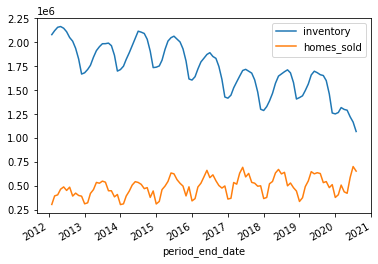

In [16]:
# Plot the inventory and homes_sold series
df_home_sales[["inventory", "homes_sold"]].plot();

In [18]:
# Plot 2014 home sales data
# sales_2014.plot(title="Homes Sold in 2014")

In [19]:
df_home_sales["homes_sold"].groupby(by=[df_home_sales.index]).sum()

period_end_date
2012-02-01    304737
2012-03-01    394034
2012-04-01    404927
2012-05-01    464281
2012-06-01    487959
               ...  
2020-04-01    436855
2020-05-01    421351
2020-06-01    587635
2020-07-01    700733
2020-08-01    652878
Name: homes_sold, Length: 103, dtype: int64

In [21]:
quarterly_sales_per_year = df_home_sales["homes_sold"].groupby(by=[df_home_sales.index.year, df_home_sales.index.quarter]).sum()

<AxesSubplot:xlabel='period_end_date,period_end_date'>

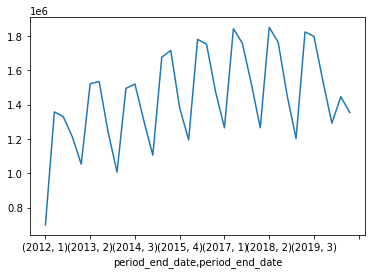

In [22]:
# Plot total quarterly home sales per year
quarterly_sales_per_year.plot()

In [26]:
# Plot quarterly home sales per year using a heatmap
df_home_sales.hvplot.heatmap(
    x="index.year",
    y="index.quarter",
    C="homes_sold",
    cmap="blues"
).aggregate(function=np.mean)

:HeatMap   [index.year,index.quarter]   (homes_sold)

In [27]:
df_home_sales[["inventory", "homes_sold"]].corr()

,inventory,homes_sold
inventory,1.000000,-0.006937
homes_sold,-0.006937,1.000000
